# Taxi Price Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/taxi_trip_pricing.csv')

## Exploratory Data Analysis

In [3]:
df.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
df.shape

(1000, 11)

In [5]:
df.size

11000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [8]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

,0
Trip_Distance_km,867
Time_of_Day,4
Day_of_Week,2
Passenger_Count,4
Traffic_Conditions,3
Weather,3
Base_Fare,290
Per_Km_Rate,150
Per_Minute_Rate,41
Trip_Duration_Minutes,917


## Data Visualization

In [11]:
df_dv = df.copy()

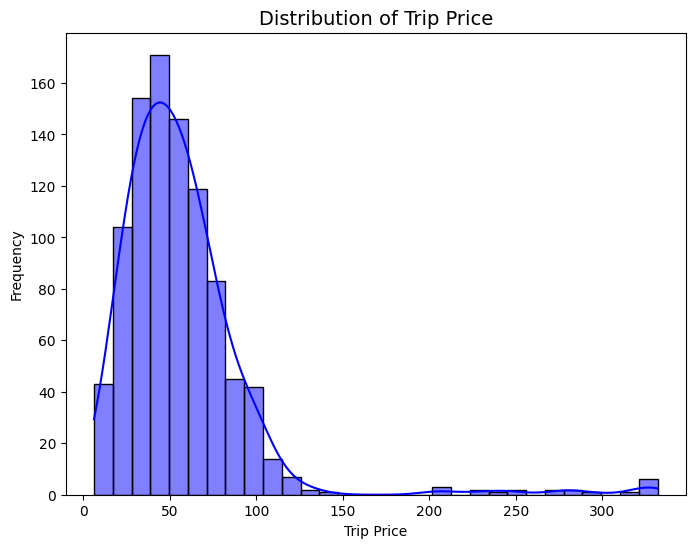

In [12]:
# Distribution of Trip Price

plt.figure(figsize=(8, 6))
sns.histplot(data=df_dv, x='Trip_Price', kde=True, bins=30, color='blue')
plt.title('Distribution of Trip Price', fontsize=14)
plt.xlabel('Trip Price')
plt.ylabel('Frequency')
plt.show()

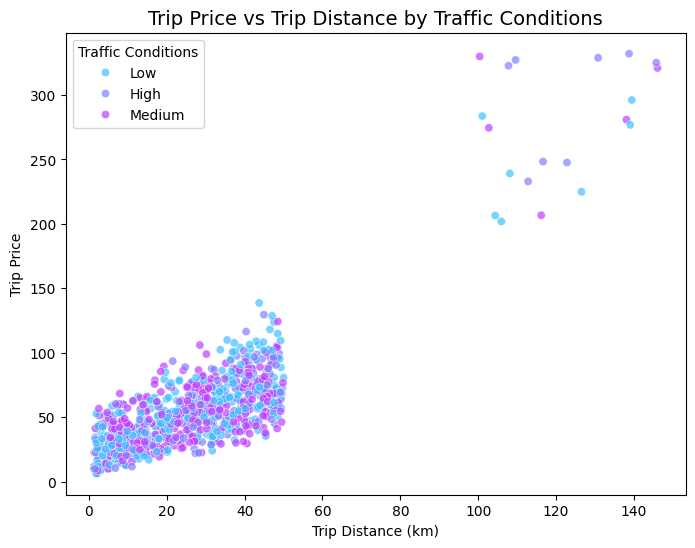

In [13]:
# Trip Price vs Trip Distance

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dv, x='Trip_Distance_km', y='Trip_Price', hue='Traffic_Conditions', palette='cool', alpha=0.7)
plt.title('Trip Price vs Trip Distance by Traffic Conditions', fontsize=14)
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price')
plt.legend(title='Traffic Conditions')
plt.show()

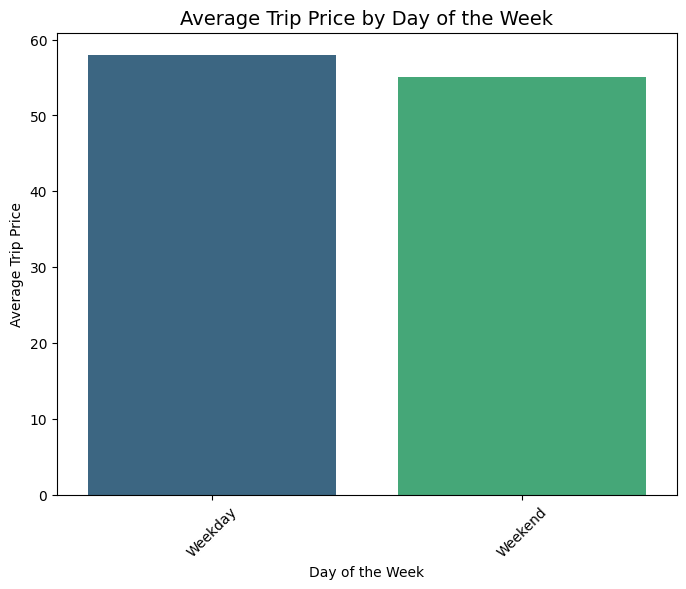

In [14]:
# Average Trip Price by Day of the Week

plt.figure(figsize=(8, 6))
sns.barplot(data=df_dv, x='Day_of_Week', y='Trip_Price', palette='viridis', ci=None)
plt.title('Average Trip Price by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Price')
plt.xticks(rotation=45)
plt.show()

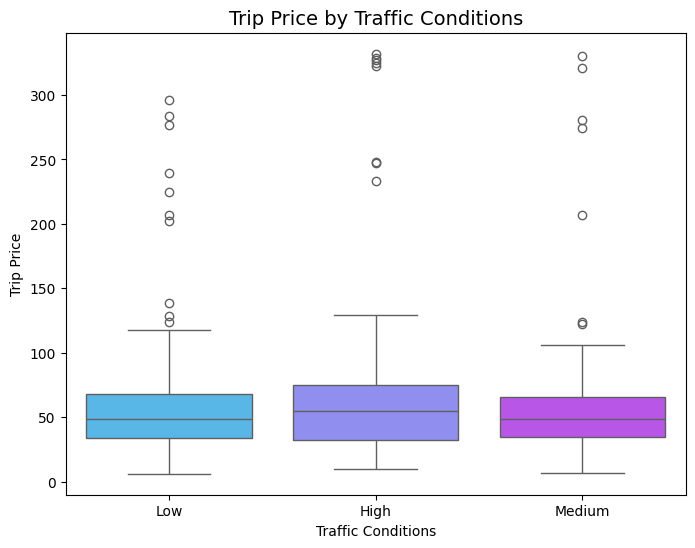

In [15]:
#  Box Plot of Trip Price by Traffic Conditions

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_dv, x='Traffic_Conditions', y='Trip_Price', palette='cool')
plt.title('Trip Price by Traffic Conditions', fontsize=14)
plt.xlabel('Traffic Conditions')
plt.ylabel('Trip Price')
plt.show()

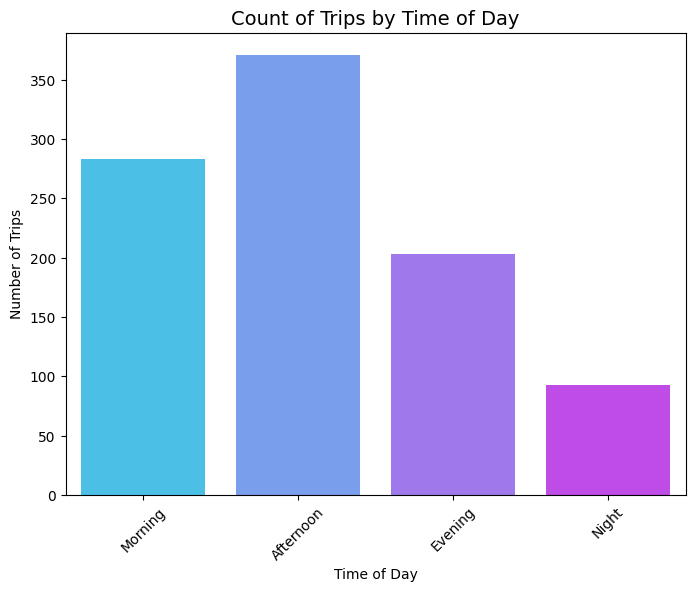

In [16]:
# Count of Trips by Time of Day

plt.figure(figsize=(8, 6))
sns.countplot(data=df_dv, x='Time_of_Day', palette='cool')
plt.title('Count of Trips by Time of Day', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

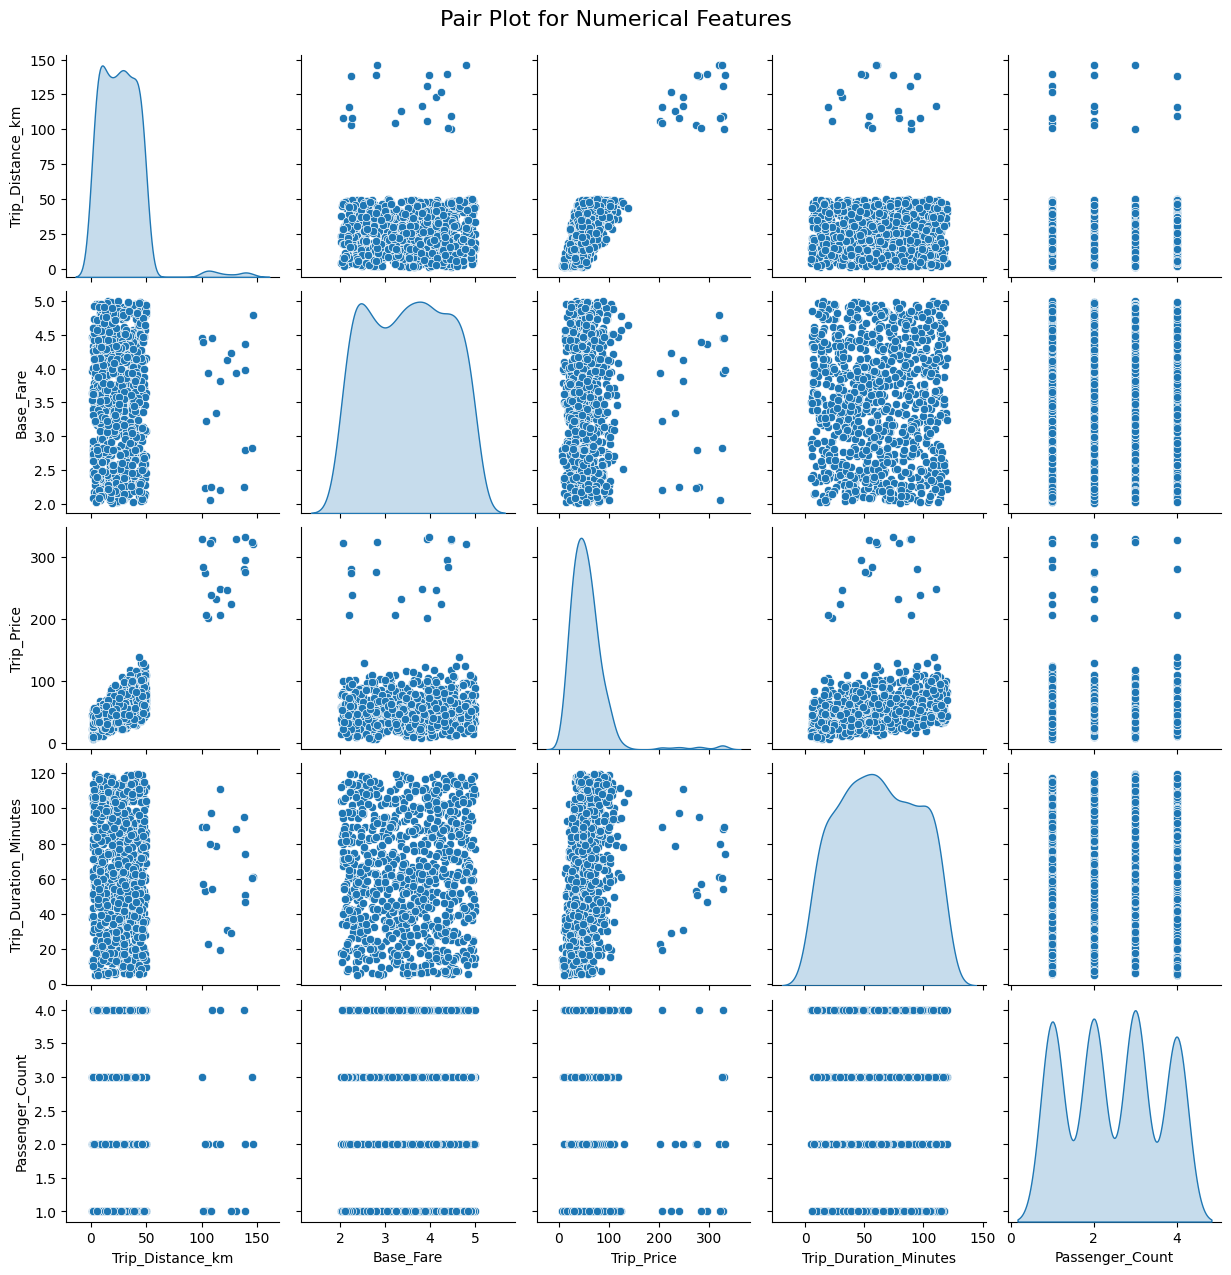

In [17]:
# Pair Plot for Relationships Between Numerical Features

sns.pairplot(df_dv[['Trip_Distance_km', 'Base_Fare', 'Trip_Price', 'Trip_Duration_Minutes', 'Passenger_Count']], diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot for Numerical Features', y=1.02, fontsize=16)
plt.show()

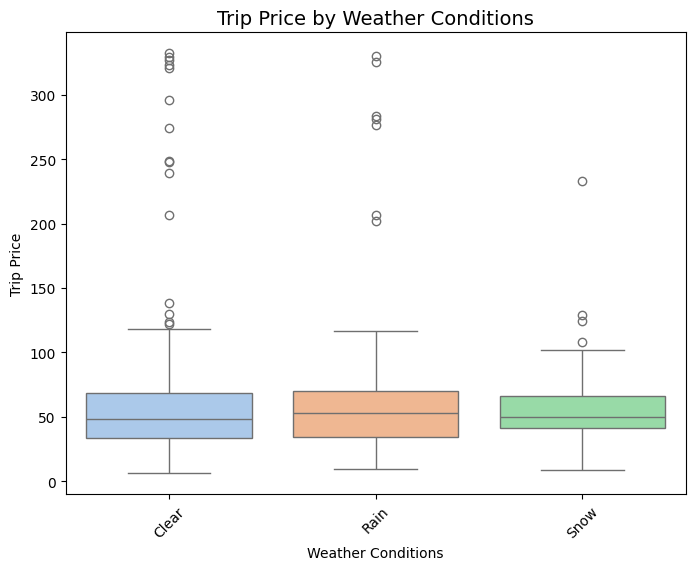

In [18]:
# Trip Price vs Weather Conditions

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_dv, x='Weather', y='Trip_Price', palette='pastel')
plt.title('Trip Price by Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions')
plt.ylabel('Trip Price')
plt.xticks(rotation=45)
plt.show()

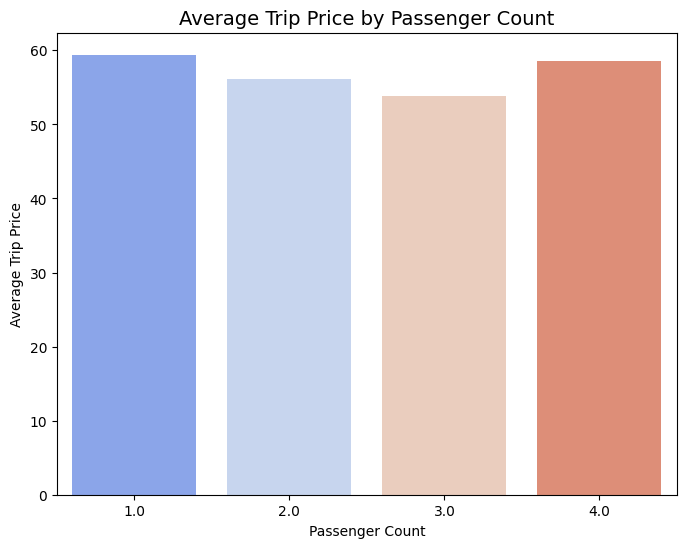

In [19]:
# Average Trip Price by Passenger Count

plt.figure(figsize=(8, 6))
sns.barplot(data=df_dv, x='Passenger_Count', y='Trip_Price', ci=None, palette='coolwarm')
plt.title('Average Trip Price by Passenger Count', fontsize=14)
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Price')
plt.show()

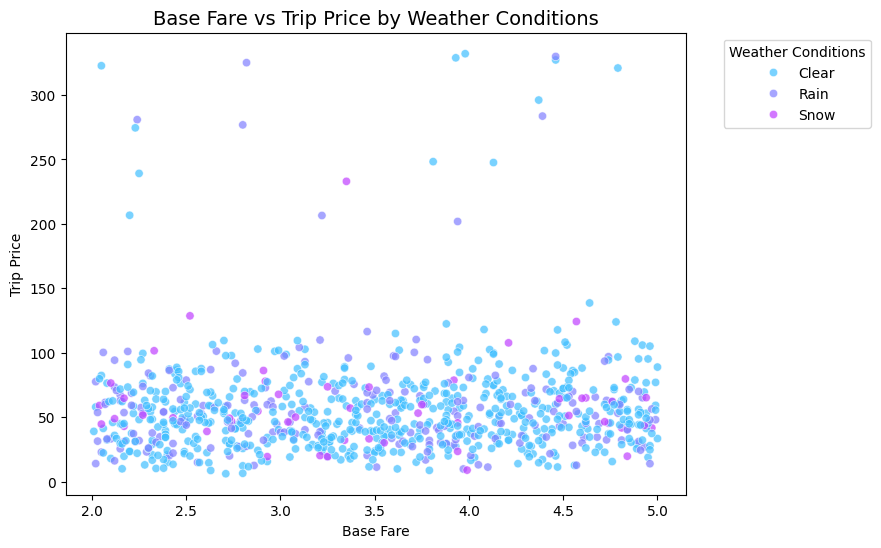

In [20]:
# Relationship Between Base Fare and Trip Price

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dv, x='Base_Fare', y='Trip_Price', hue='Weather', palette='cool', alpha=0.7)
plt.title('Base Fare vs Trip Price by Weather Conditions', fontsize=14)
plt.xlabel('Base Fare')
plt.ylabel('Trip Price')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

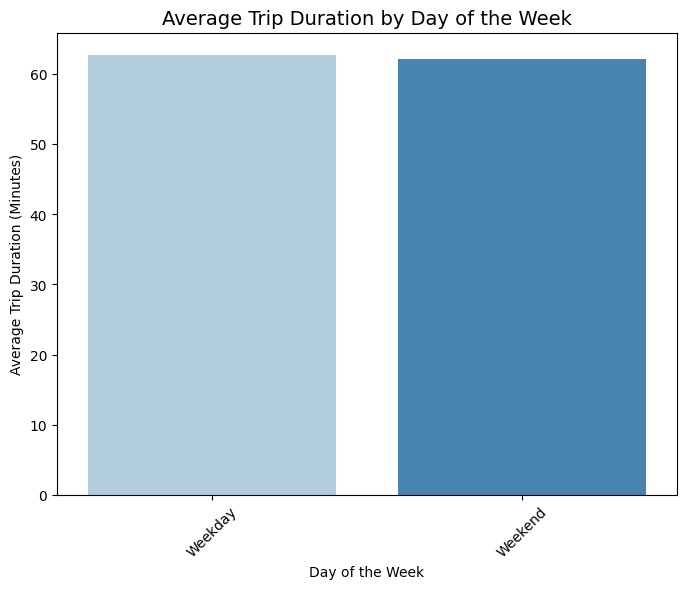

In [21]:
# Average Trip Duration by Day of the Week

plt.figure(figsize=(8, 6))
sns.barplot(data=df_dv, x='Day_of_Week', y='Trip_Duration_Minutes', ci=None, palette='Blues')
plt.title('Average Trip Duration by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

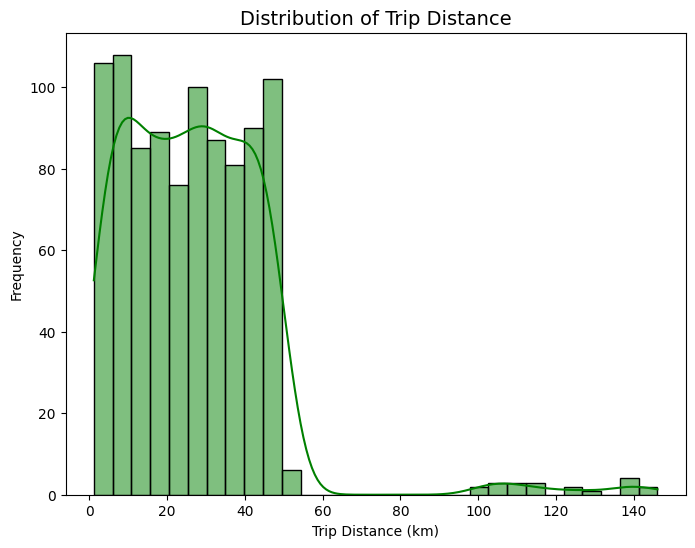

In [22]:
# Distribution of Trip Distance

plt.figure(figsize=(8, 6))
sns.histplot(data=df_dv, x='Trip_Distance_km', kde=True, bins=30, color='green')
plt.title('Distribution of Trip Distance', fontsize=14)
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

In [23]:
# Function to calculate missing values

def fill_nan_with_equation(df, column_name):
    equations = {
        "Trip_Price": lambda df: df["Trip_Distance_km"] * df["Per_Km_Rate"] + df["Base_Fare"] + df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"],
        "Trip_Distance_km": lambda df: (df["Trip_Price"] - df["Base_Fare"] - df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"]) / df["Per_Km_Rate"],
        "Base_Fare": lambda df: df["Trip_Price"] - df["Trip_Distance_km"] * df["Per_Km_Rate"] - df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"],
        "Per_Minute_Rate": lambda df: (df["Trip_Price"] - df["Base_Fare"] - df["Trip_Distance_km"] * df["Per_Km_Rate"]) / df["Trip_Duration_Minutes"],
        "Per_Km_Rate": lambda df: (df["Trip_Price"] - df["Base_Fare"] - df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"]) / df["Trip_Distance_km"],
        "Trip_Duration_Minutes": lambda df: (df["Trip_Price"] - df["Base_Fare"] - df["Per_Minute_Rate"] * df["Trip_Distance_km"]) / df["Per_Km_Rate"],
    }

    if column_name in equations:
        valid_rows = df.dropna(subset=["Trip_Price", "Trip_Distance_km", "Base_Fare",
                                       "Per_Minute_Rate", "Per_Km_Rate", "Trip_Duration_Minutes"])
        try:
            df.loc[df[column_name].isna(), column_name] = equations[column_name](valid_rows)
        except ZeroDivisionError:
            print(f"Division by zero encountered while calculating {column_name}.")
        except Exception as e:
            print(f"Error encountered for column {column_name}: {e}")

    return df


def fill_nan_with_defaults(df):
    default_fill_values = {
        "Trip_Price": df["Trip_Price"].mean(),
        "Trip_Distance_km": df["Trip_Distance_km"].mean(),
        "Base_Fare": df["Base_Fare"].mean(),
        "Per_Minute_Rate": df["Per_Minute_Rate"].mean(),
        "Per_Km_Rate": df["Per_Km_Rate"].mean(),
        "Trip_Duration_Minutes": df["Trip_Duration_Minutes"].mean(),
        "Time_of_Day": df["Time_of_Day"].mode()[0],
        "Day_of_Week": df["Day_of_Week"].mode()[0],
        "Traffic_Conditions": df["Traffic_Conditions"].mode()[0],
        "Weather": df["Weather"].mode()[0],
        "Passenger_Count": df["Passenger_Count"].mode()[0],
    }

    for column, value in default_fill_values.items():
        df[column] = df[column].fillna(value)

    return df

def resolve_dependencies_and_fill(df):
    columns_to_fill_with_equation = [
        "Trip_Price",
        "Trip_Distance_km",
        "Base_Fare",
        "Per_Minute_Rate",
        "Per_Km_Rate",
        "Trip_Duration_Minutes",
    ]

    for column in columns_to_fill_with_equation:
        df = fill_nan_with_equation(df, column)

    df = fill_nan_with_defaults(df)
    if df.isna().sum().sum() > 0:
        print("Warning: Some NaN values still remain. Filling them with column means/modes.")
        df = fill_nan_with_defaults(df)

    return df

df = resolve_dependencies_and_fill(df)

In [24]:
# Logarithmic transformation

df["Trip_Price"] = np.log1p(df["Trip_Price"])
df["Trip_Distance_km"] = np.log1p(df["Trip_Distance_km"])

In [25]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Time_of_Day"] = le.fit_transform(df["Time_of_Day"])
df["Day_of_Week"] = le.fit_transform(df["Day_of_Week"])
df["Traffic_Conditions"] = le.fit_transform(df["Traffic_Conditions"])
df["Weather"] = le.fit_transform(df["Weather"])

In [26]:
# Train Test and Split

from sklearn.model_selection import train_test_split

threshold = 0.03

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Trip_Price"]) > threshold].tolist()
high_corr_features.remove("Trip_Price")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["Trip_Price"]

X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

['Trip_Distance_km', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']


## Model Building

In [27]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [28]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [29]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.8344645622659304,
 0.8915587321579301,
 0.9005925987997728,
 0.8157718865418903,
 0.913960588611973,
 0.8787956543954708]

## Model Prediction

In [30]:
GradBoost_Model = Grad_boost.fit(X_train,y_train)
print("The R2 score of Gradient Boosting Regressor: ",r2_score(y_test,Grad_boost.predict(X_test)))

The R2 score of Gradient Boosting Regressor:  0.9143726579365636


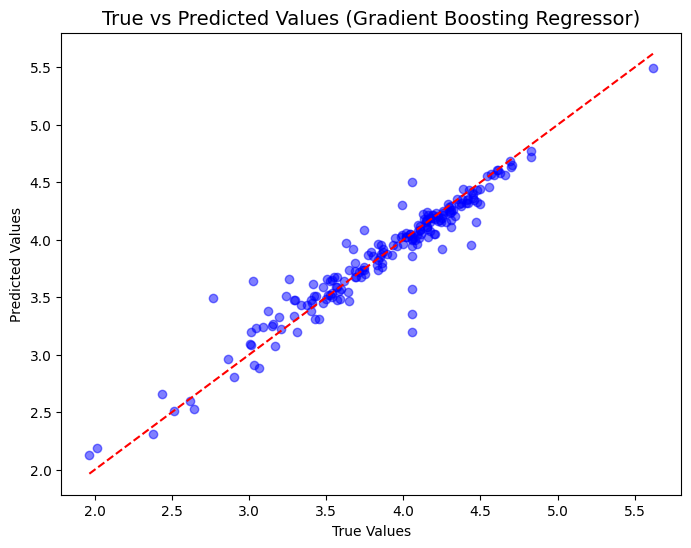

In [31]:
y_pred = Grad_boost.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs Predicted Values (Gradient Boosting Regressor)', fontsize=14)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()